# Capstone Final Project -  Car accident severity

## Author: Jovanny Ulloa

### Introduction

<p>Car accidents are being a worldwide problem in our days, not only because they represent an economic problem and also, lifes are in game within these kind of events. However, now it is possible to detect all those conditions or factors that can decrease or increase the probability of an accident with the behaviour understanding of all the variables that participate.</p>

### Business problem:

<p>To help people to confront this problem, within an effort to contribute on the management of these fatal events, an algorythm is going to be developed to predict car accidents and advertise a driver when conditions are wrong enough to represent a risk.

This can bring some benefits as: saving lives of drivers (our target audience) and decrease costs for goverment (our stakeholders).</p> 

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Data collect and data understanding

Our source, which belongs to reports from 2004 to 2020, is organized with 37 attributes and 194674 rows.

After some enough data analysis of this CSV file, our target or dependent variable is going to be "SEVERITYCODE", this field or attribute is used to measure the severity of a car accident with a range from 0 to 5. So, all the algorytm development is going to be focused on this variable, with the next values:
<ul>
    <li>0 : Little to no Probability</li>
<li>1 : Very Low Probablility - Chance or Property Damage</li>
<li>2 : Low Probability - Chance of Injury</li>
<li>3 : Mild Probability - Chance of Serious Injury</li>
<li>4 : High Probability - Chance of Fatality</li>
</ul>
By the other side, these are our independent variables or fields:
1. WEATHER <br>
2. ROADCOND<br>
3. LIGHTCOND<br>
4. COLLISIONYTPE<br>
5. UNDERINFL

In [10]:
# DATA

# Collecting data
df = pd.DataFrame(pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"))
head = data.head()

# Data understanding
print('Registers:', df.shape[0])
print('Cathegories:', df.shape[1])
df.dtypes

Registers: 194673
Cathegories: 38


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [11]:
# Checking missing values
df.isna().sum().to_frame().rename(columns={0: 'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


In [27]:
severity_codes = data['SEVERITYCODE'].value_counts()
severity_codes

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

The information is unbalanced by the difference in samples for every accident type.

1 - 136485

2 - 58188

We can solve this issue by downsampling the majority class to balance data:

1 - 58188

2 - 58188

In [52]:
# Balance data
from sklearn.utils import resample

data_sev_majority = df[df['SEVERITYCODE'] == 1]
data_sev_minority = df[df['SEVERITYCODE'] == 2]

data_sev_min_sampled = resample(data_sev_majority,
                                replace = False,
                                n_samples = 58188,
                                random_state=123)

data_balanced = pd.concat([data_sev_min_sampled,data_sev_minority])

data_result = data_balanced['SEVERITYCODE'].value_counts()
data_result # Balanced data

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

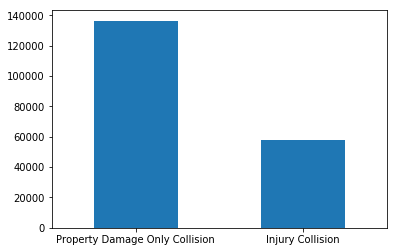

In [53]:
import matplotlib.pyplot as plt
df['SEVERITYDESC'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'detail of accidents in Seattle by type')

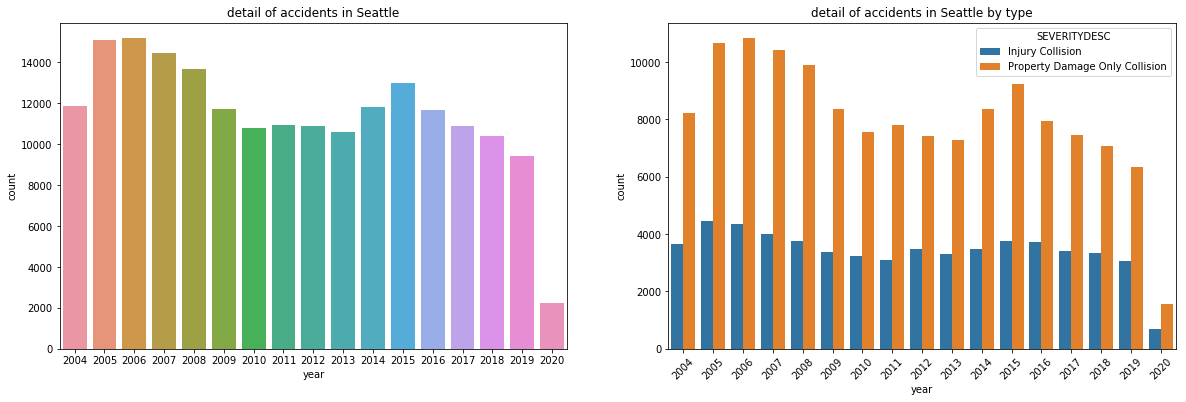

In [54]:
# DATA VISUALIZATION

# Anual ammount of accidents
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts().sort_index()

sns.countplot(x="year", data=df, ax=ax1)
sns.countplot(x="year", hue="SEVERITYDESC", data=df, ax=ax2)

plt.xticks(rotation=45)
ax1.set_title('detail of accidents in Seattle')
ax2.set_title('detail of accidents in Seattle by type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

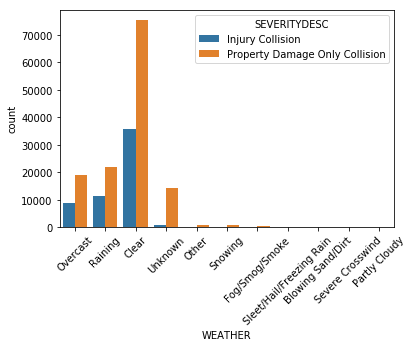

In [55]:
# Plotting within our independent variables to understand their behaviour

# WEATHER
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

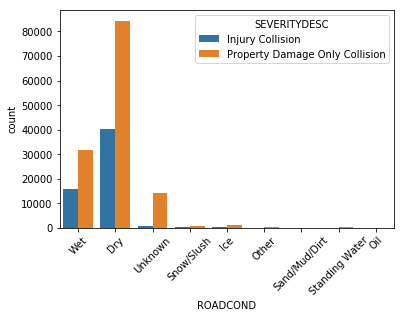

In [56]:
# ROAD CONDITIONS
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

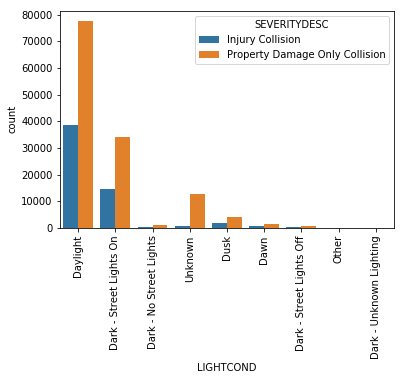

In [57]:
# LIGHT CONDITIONS
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

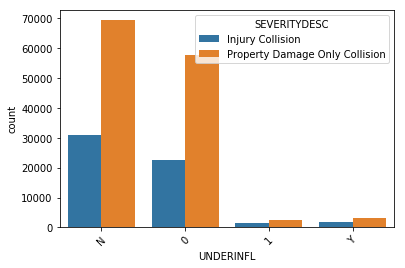

In [58]:
# UNDER INFLUENCE OF SUBSTANCES
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

## Methodology

### Data preparation

#### STEP 1:
It is important to do a data cleaning of our registers to make data readable and useful for the models and balance it.

#### STEP 2: 
There were more than 30 cathegories or variables to analyze these future models, however the ones that are going to be used are:
WEATHER, ROADCOND, LIGHTCOND, UNDERINFL AND COLLISION TYPE, they will be related to our target that is SEVERITYCODE

#### STEP 3:
For the cathegoric variables, it will be necessary to apply a label encoding.

#### STEP 4:
When data is ready, a dataset with independent variables (X) is going to be created, by (Y) for the dependent ones. We will use a split function to train data by these rules:
70% for trainning
30% for testing but normalized

### Modeling and deployment

After the data preparation, we are going to use next models. When each model is developed, it will be evaluated with the next parameters:
<ul>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>F1-SCORE</li>
</ul>

Description of the models:
<ul>
    <li> Logistic Regression: to classify data by calculating the probability of its classes</li>
<li> Decision Tree: to classify by creating roots of subsets from data to take decisions</li>
<li> KNN: to classify by catching its neighbours.
    Note: Default K=2 (Number of classes/SEVERITYCODES).</li>
</ul>

In [59]:
# DATA PREPARATION (STEP 1 AND STEP 2)

# Clean from irrelevant data and unecessary columns/attr
data = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]
data = data.dropna()

# Checking types before transforming cathegorical attr
data.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
SEVERITYCODE      int64
dtype: object

In [71]:
# Transforming cathegorical attr (STEP 3)
data['UNDERINFL'].replace(to_replace=['N','Y','0'], value=[0,1,0],inplace=True)
data['UNDERINFL'].value_counts()

0    180219
1      9097
Name: UNDERINFL, dtype: int64

In [73]:
independent = data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for i in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    independent[i] = independent[i].astype('|S') 
    independent[i] = LabelEncoder().fit_transform(independent[i])

features.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


In [74]:
# Create x,y and train (STEP 4)
X = features
y = data['SEVERITYCODE'].values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
109717,0,1,0,5,0
9615,7,1,0,5,0
133991,3,1,0,5,0
76012,5,1,0,5,0
97913,9,10,7,8,0


In [75]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]
X_test[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.90028023, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559],
       [ 0.18231884, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [ 0.90028023,  0.32670431, -0.71028447,  0.93363748, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559]])

In [81]:
# MODELING

# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.0001, solver='liblinear')
lr.fit(X_train, y_train)
lr

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [82]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train, y_train)
model_tree



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [90]:
# EVALUATION

import numpy as np
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

# Logistic regression

yhat_proba = lr.predict_proba(X_test)
yhat = lr.predict(X_test)
yhat_lr = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

In [91]:
# Decision tree 

yhat = dt.predict(X_test)
yhat_tree = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(jaccard,2), round(f1_score_tree,2), round(precision_tree,2)]


In [92]:
# KNN

yhat = knn.predict(X_test)
yhat_knn = yhat
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(jaccard,2), round(f1_score_knn,2), round(precision_knn,2)]

In [ ]:
print("Results:\n")
print("LR - Train Accuracy =  ", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("LR - TesT Accuracy =  ", metrics.accuracy_score(y_test, yhat))
print("DECISION TREE - Train Accuracy = ", metrics.accuracy_score(y_train, dt.predict(X_train)))
print("DECISION TREEE - Test Accuracy = ", metrics.accuracy_score(y_test, yhat))
print("KNN -Train Accuracy = ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("KNN - Test Accuracy = ", metrics.accuracy_score(y_test, yhat))

Results:

LR - Train Accuracy =   0.6989156435583794
LR - TesT Accuracy =   0.7363676379963024
DECISION TREE - Train Accuracy =  0.6989156435583794
DECISION TREEE - Test Accuracy =  0.7363676379963024


In [95]:
final_r = pd.DataFrame(data=np.array([lr_report, tree_report, knn_report]),columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
final_r

,Algorithm,Jaccard,F1-score,Precision
0,Logistic Regression,0.7,0.58,0.68
1,Decision Tree,0.7,0.58,0.68
2,KNN,0.74,0.67,0.74


### Results
In this last dataframe we resume the final results of the parameters that we measured for each model. As we can see the Jaccard Score equals more than 0.7 in the 3 models, however the best accuracy is for the Decision Tree.
It also has a great F1_SCORE

### Discussions 

After developing 3 models to compare them within their results, we can see that they have a behavour with almost the same level of performance, but in this case the Decision Tree had an small difference in contrast to Logistic Regression and KNN. This context would give to the Decision Tree the role to be implemented as the core of a future application.

### Conclusions

This project had the purpose of understanding the data over an interesting perspective, because with the described process we could see how variables interact each other to generate a kind of relation that for research purposes can give us answsers about our environment. It was interesting to say that less than 30% of the files or attributes of this dataset could be useful to determine possible situations through a model, however we cannot loose the opportunity to continue improving these kind of projects in order to get more useful results and in the case of our world, reduce those costs that are invested in many accidents and mainly, the lives that we need to preserve.
